# Walkthrough of Tensorsflow Shallow Net (Lesson 1)

- We are building a digit classifier using a shallow neural network of 3 layers
    - ### Layer 1: input layer (28x28 pixels, or 784 inputs)
        - Each pixel has an 8 digit value representing its colour (0 = white, 255 = black)
   
   - ### Layer 2: 64 sigmoid neurons (hidden layer)
   
   - ### Layer 3: 10 softmax neurons (output layer)
   
  

### Load the required dependencies:

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist #Keras module to build tensorflow model easily
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input #added input layer import for specifying input sizes
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt #for visualization purposes

### Load data:

In [2]:
#x is the inputs, y is the outputs in the training/validation datasets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data() 
print("successfully loaded MNIST data")

successfully loaded MNIST data


In [3]:
X_train.shape #60,000 input images in MNIST data set, each are 28x28 pixels in size

(60000, 28, 28)

In [4]:
y_train.shape  #Corresponding label for each input image (60,000 labels for 60,000 digits)

(60000,)

In [5]:
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

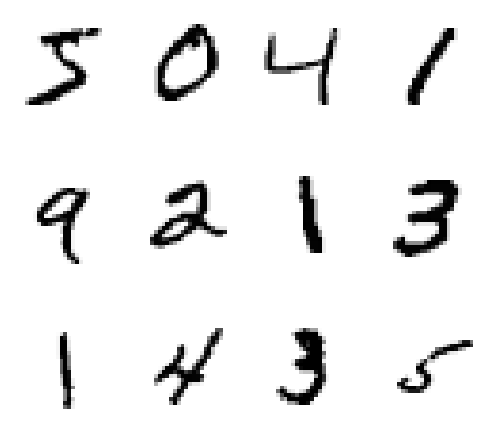

In [6]:
#Plot the first 12 training images to see what they look like (corresponds to labels)
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
#Look at the shape of the validation data
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

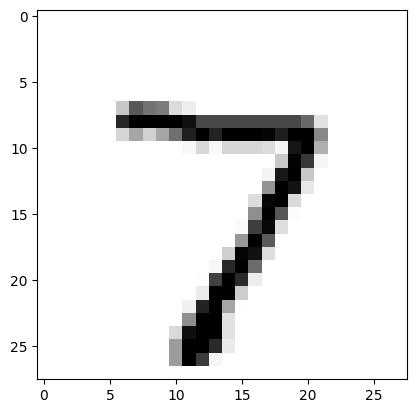

In [9]:
plt.imshow(X_valid[0], cmap='Greys') #cmap parameter makes the pixels black/white like how they are in training set

In [10]:
X_valid[0] #should get a 28x28 2D array 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

### Preprocessing the data:

In [12]:
#change all values in the training set from 8 bit unsigned integers to 32 bit float
X_train = X_train.reshape(60000, 784).astype('float32') 
X_valid = X_valid.reshape(10000,784).astype('float32')

In [13]:
#We just converted the integers to floats so that we can normalize the values as a float between 0 and 1 
# 0 is false, 1 is true, easier for classification 
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0] #should see the normalized values (all values in the 2D array are now between 0/1)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
num_digits = 10 # the number of possible digits (0-9)

# Convert the integer label into a one-hot encoding
y_train = to_categorical(y_train, num_digits)
y_valid = to_categorical(y_valid, num_digits)


In [16]:
y_valid[0] #7 is now encoded by an array of size 10, where all elements are 0 expect for index 7, which is 1

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

We do this one-hot encoding because it is the optimal output of the neural network when it is fed with 7 (or whatever input we give it). We can interpret this output format as having a 1 (100%) chance that the input digit is a 7, while all other digits have a probability of 0. 

#### Design Neural Network Architecture

In [17]:
model = Sequential()

#input layer:
model.add(Input(shape=(784,)))
model.add(Dense(64, activation='sigmoid')) #64 sigmoid neurons 

#input_shape specifies how many inputs the model should expect (784 for the 28x28 size input digits)

#output layer:
model.add(Dense(10, activation='softmax')) #10 softmax neurons

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

# Explanation of the numbers from model.summary():

<b>Total # of parameters in a layer = total # of weights + total # of biases</b>

(784 inputs/neuron * 64 neurons in hidden layer) + 64*(1 bias/neuron) = <b>50240 parameters</b> for first dense layer


(64 inputs/neuron * 10 neurons in dense_1 layer) + 10*(1 bias/neuron) = <b>650 parameters</b> for second dense layer


Therefore, the total parameters = sum of all parameters in all layers = <b>50890 parameters</b>



#### Compiling the model: 

In [19]:
# loss: measures where our model is incorrect (a metric to measure how much error in approximation)
# SGD: stocastic gradient descent
# lr: learning rate
# accuracy: % of correct guesses that model makes


model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
              



#### Training the model (post-compilation)

In [20]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid)) 
# verbose=1 will produce outputs as model trains

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.1365 - loss: 0.0936 - val_accuracy: 0.1431 - val_loss: 0.0922
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.1478 - loss: 0.0919 - val_accuracy: 0.1511 - val_loss: 0.0911
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.1525 - loss: 0.0910 - val_accuracy: 0.1562 - val_loss: 0.0905
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.1605 - loss: 0.0904 - val_accuracy: 0.1662 - val_loss: 0.0900
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.1671 - loss: 0.0899 - val_accuracy: 0.1795 - val_loss: 0.0896
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.1835 - loss: 0.0895 - val_accuracy: 0.1994 - val_loss: 0.0893
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.2024 - loss: 0.0892 - val_accuracy: 0.2342 - val_loss: 0.0889
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.2347 - loss: 0

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.5454 - loss: 0.0712 - val_accuracy: 0.5468 - val_loss: 0.0704
Epoch 51/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5492 - loss: 0.0706 - val_accuracy: 0.5517 - val_loss: 0.0699
Epoch 52/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.5575 - loss: 0.0700 - val_accuracy: 0.5564 - val_loss: 0.0694
Epoch 53/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.5613 - loss: 0.0696 - val_accuracy: 0.5608 - val_loss: 0.0689
Epoch 54/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5677 - loss: 0.0690 - val_accuracy: 0.5646 - val_loss: 0.0683
Epoch 55/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.5737 - loss: 0.0683 - val_accuracy: 0.5689 - val_loss: 0.0678
Epoch 56/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5762 - loss: 0.0679 - val_accuracy: 0.5748 - val_loss: 0.0673
Epoch 57/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5830 - loss: 0.0673

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.7012 - loss: 0.0495 - val_accuracy: 0.7145 - val_loss: 0.0488
Epoch 100/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.7037 - loss: 0.0494 - val_accuracy: 0.7169 - val_loss: 0.0485
Epoch 101/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.7065 - loss: 0.0491 - val_accuracy: 0.7207 - val_loss: 0.0481
Epoch 102/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.7086 - loss: 0.0487 - val_accuracy: 0.7249 - val_loss: 0.0478
Epoch 103/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.7110 - loss: 0.0483 - val_accuracy: 0.7278 - val_loss: 0.0475
Epoch 104/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.7151 - loss: 0.0480 - val_accuracy: 0.7304 - val_loss: 0.0472
Epoch 105/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.7157 - loss: 0.0480 - val_accuracy: 0.7329 - val_loss: 0.0469
Epoch 106/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.7170 - loss:

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8116 - loss: 0.0368 - val_accuracy: 0.8179 - val_loss: 0.0359
Epoch 149/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8106 - loss: 0.0368 - val_accuracy: 0.8193 - val_loss: 0.0357
Epoch 150/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8131 - loss: 0.0365 - val_accuracy: 0.8205 - val_loss: 0.0355
Epoch 151/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8129 - loss: 0.0365 - val_accuracy: 0.8225 - val_loss: 0.0353
Epoch 152/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.8137 - loss: 0.0363 - val_accuracy: 0.8246 - val_loss: 0.0352
Epoch 153/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8178 - loss: 0.0359 - val_accuracy: 0.8256 - val_loss: 0.0350
Epoch 154/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8180 - loss: 0.0357 - val_accuracy: 0.8271 - val_loss: 0.0348
Epoch 155/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8177 - loss:

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8544 - loss: 0.0293 - val_accuracy: 0.8619 - val_loss: 0.0282
Epoch 198/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8578 - loss: 0.0288 - val_accuracy: 0.8622 - val_loss: 0.0281
Epoch 199/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.8575 - loss: 0.0289 - val_accuracy: 0.8627 - val_loss: 0.0279
Epoch 200/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.8531 - loss: 0.0290 - val_accuracy: 0.8628 - val_loss: 0.0278


#### Evaluate the models overall performance:

In [21]:
model.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8411 - loss: 0.0308


[0.027823923155665398, 0.8628000020980835]

With a simple shallow architecture, still able to accurately predict digit 86% of the time. Increasing the number of epochs will not significantly increase the accuracy of the model as shown with the accuracy trend in the last few steps.

#### Perform inference (check what model will predict for a given input)

In [22]:
valid_0 = X_valid[0].reshape(1, 784) #just get one input which is 784 (28x28) in size

In [23]:
model.predict(valid_0) #input valid_0 into our shallow neural network 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[4.6577826e-03, 7.9463294e-04, 2.3668197e-03, 6.3125002e-03,
        6.5576392e-03, 1.4565578e-02, 7.1712059e-04, 9.1214538e-01,
        9.0626348e-03, 4.2819839e-02]], dtype=float32)

From the output array, 9.2151618e-01 is the highest probability, which corresponds to index 7. Thus, the model will predict that the input digit is a 7. This is expected as X_valid[0] is a 7 from the validation set. 

In [24]:
import numpy as np
np.argmax(model.predict(valid_0), axis=-1) #gets the highest probability in the output array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([7])